# Predicción de ACV 

### Abstract
Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular(ACV) es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11 % del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. 
La predicción de ACV en base a los habitos de las personas, puede identificar patrones a evitar, para reducir al mínimo el riesgo de sufrir esta patólogía. Esto resulta provechoso no solo a nivel individual, sino tambien en el ahorro de recursos economicos que la sociedad destina a tratar esta enfermedad.




### Hipótesis
La incidencia de Accidente Cerebrovascular(ACV) no es un suceso azaroso sino que se produce por hábitos poco saludables e identificables.

### Objetivo
Encontrar patrones de comportamientos identificables que predisponen a una persona a sufrir ACV. Generar un modelo que prediga la probabilidad de una persona a sufrir un ACV.

### Contexto comercial
Los datos se obtuvieron del sitio web kaggle. No hay referencias de si fueron publicados en un articulo. 

Fuente: https://www.kaggle.com/code/ruthvikpvs/stroke-data-analysis-and-prediction/notebook

### Problema comercial
Dados ciertas varialbes que son de facil medición ¿Se puede predecir si una persona sufrirá un ACV?

### Contexto analítico
Los datos fueron obtenidos de un centro de salud. El dataset cuenta de 11 caracteristicas clinicas que potencialmente podrian ser usadas en un modelo de predicción de ACV.

1) id: Identificador

2) gender: "Male", "Female" u "Other" 

3) age: edad del paciente

4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión 

5) heart_disease: 0 si el paciente no tiene enfermedades cardiovasculares, 1 si el paciente tiene enfermedades cardiovasculares 

6) ever_married: Si estuvo o no casado/a

7) work_type: El tipo de empleo 

8) Residence_type: Si vive en zona rural o urbana

9) avg_glucose_level: nivel medio de azúcar en sangre

10) bmi: indice de masa corporal

11) smoking_status: Si es fumador, ex-fumador, nunca fumo o no se tienen datos. 

12) stroke: 1 si el paciente sufrio ACV(ACV+) y 0 si no sufrio ACV(ACV-) 



### Importación de librerias y dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# evita poner plt.show en los graficos de seaborn.
%matplotlib inline

In [3]:
raw_df_stroke = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQHKrR2P-CPVKCg6E__bUvgWYta9dEP14arcLTS24x2XgDR-IIWqzRiaUBcR4Ij1__Q2KXO-2sfeTwq/pub?output=csv')
df_stroke = raw_df_stroke.copy()

### Data Wrangling

Como primera medida, se realizarán modificaciones en el dataset para trabajar de manera adecuada.

In [4]:
#saco la columna id porque no es relevante 
df_stroke.drop(columns=['id'],inplace=True) 
# Elimino la fila con gender=Other porque es una sola cuenta y queda mal en las gráficas
df_stroke.drop( index=df_stroke.index[df_stroke['gender'] == 'Other'], axis='index', inplace=True)

df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Chequeo N/A
df_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df_stroke.shape

(5109, 11)

In [7]:
# Reemplazo NA. El método ffil los reemplaza con el valor anterior de la serie
df_stroke.fillna(method='ffill', inplace=True)


## Análisis exploratorio de datos (EDA)

En primera instancia se realizará un análisis exploratorio de datos, que consiste en realizar gráficas para generar un primer estudio sobre nuestro dataset. En esta instancía se buscarán patrones, correlación entre variables y el entendimiento del dataset


In [8]:
#Veo los datos estadisticos del df.
# bmi tiene 201 N/A, que se ven en count
df_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.925974,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.839250,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Me quedo con la gente que sufrio ACV
stroked = df_stroke[df_stroke['stroke'] == 1]


### Incidencia del tipo de trabajo en población ACV+

¿Es el trabajo un factor que influye en la incidencia de ACV?


[Text(0, 0, 'Privado'),
 Text(1, 0, 'Independiente'),
 Text(2, 0, 'Gobierno'),
 Text(3, 0, 'Niños')]

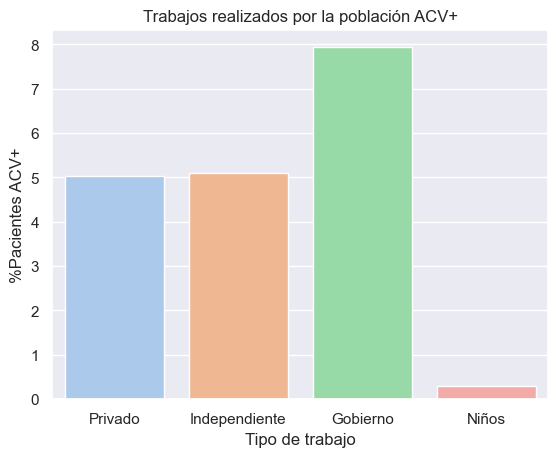

In [10]:
# Hago dataset provisorio eliminando la poblacion que nunca trabajo
z = df_stroke.drop(df_stroke[df_stroke['work_type'] == 'Never_worked'].index)

x = stroked['work_type'].unique()
y = stroked['work_type'].value_counts()/z['work_type'].value_counts()*100

# Grafico porcentaje de ACV+ normalizado respecto al n total del estudio
g = sns.barplot(x=x, y=y, palette='pastel')
g.set(title='Trabajos realizados por la población ACV+', ylabel ='%Pacientes ACV+', xlabel='Tipo de trabajo')
g.set_xticklabels(['Privado', 'Independiente', 'Gobierno', 'Niños'])



Sorprendentemente, hay una mayor incidencia de ACV+ en personas con trabajos gubernamentales. No hay mucha más información sobre que tipos de trabajo engloba esta categoria.

### Incidencia del tipo de residencia, estado civíl y género en población ACV+.


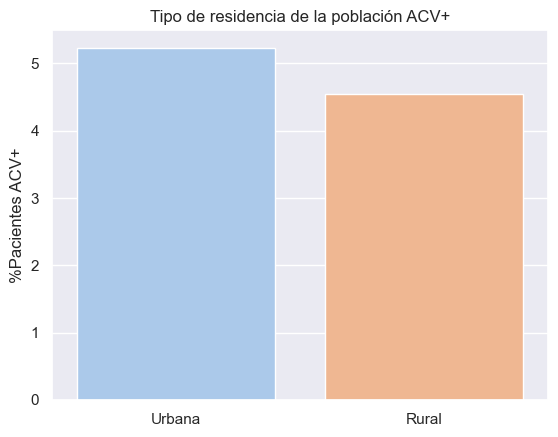

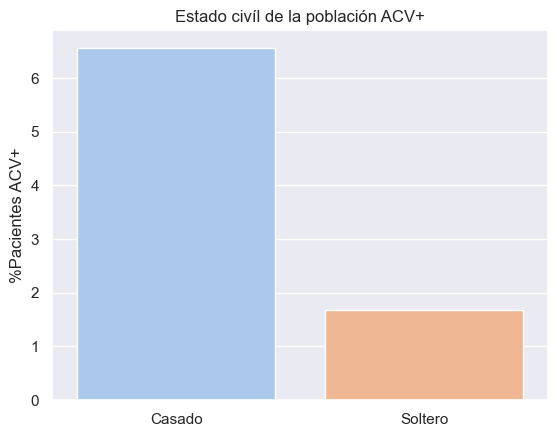

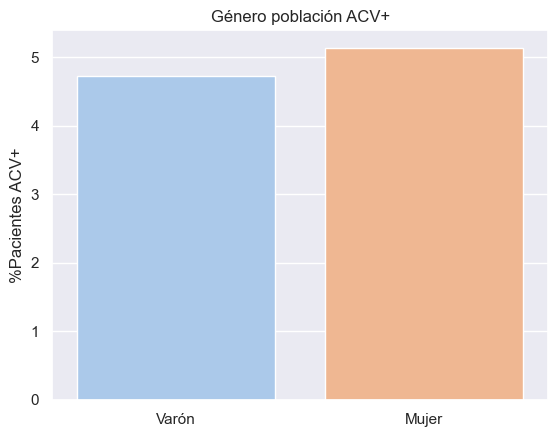

In [11]:
for f in ['Residence_type','ever_married','gender']:
    x = stroked[f].unique()
    y = stroked[f].value_counts()/z[f].value_counts()*100
    g = sns.barplot(x=x, y=y, palette='pastel')
    
    if f == 'Residence_type':
        g.set(title='Tipo de residencia de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Urbana', 'Rural'])
    elif f == 'ever_married':
        g.set(title='Estado civíl de la población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Casado', 'Soltero'])
    else:
        g.set(title='Género población ACV+', ylabel ='%Pacientes ACV+')
        g.set_xticklabels(['Varón', 'Mujer'])
    
    plt.show()


### ¿Que variables estan más relacionadas a la incidencia de ACV?

In [12]:
# Podemos ver la correlación entre stroke y las demás variables.
# Hay que tener en cuenta que esto no aplica para las variables categóricas
stroke_mx = df_stroke.corr()
stroke_mx

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.319468,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.151630,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.045270,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.166277,0.131991
bmi,0.319468,0.151630,0.045270,0.166277,1.000000,0.043806
stroke,0.245239,0.127891,0.134905,0.131991,0.043806,1.000000


<Figure size 800x600 with 0 Axes>

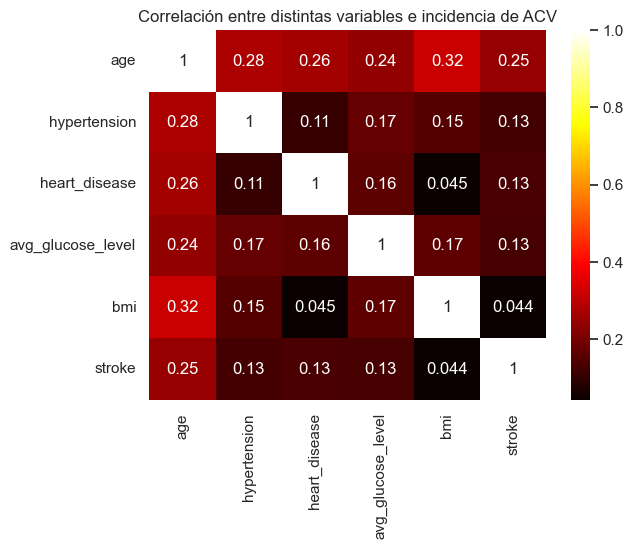

<Figure size 800x600 with 0 Axes>

In [13]:
g3 = sns.heatmap(stroke_mx, annot=True, cmap='hot')
g3.set(title='Correlación entre distintas variables e incidencia de ACV')
plt.figure(figsize=(8,6))

Parece que la edad es la variable que más influye en la incidencia de ACV, seguida en igual medida por la hipertensión, las enfermedades cardiovasculares y los niveles de azucar en sangre.

### ¿A que edad hay más incidencia de ACV?

[Text(0.5, 1.0, 'Edad de pacientes ACV+'),
 Text(0, 0.5, 'Nro de pacientes ACV+'),
 Text(0.5, 0, 'Edad')]

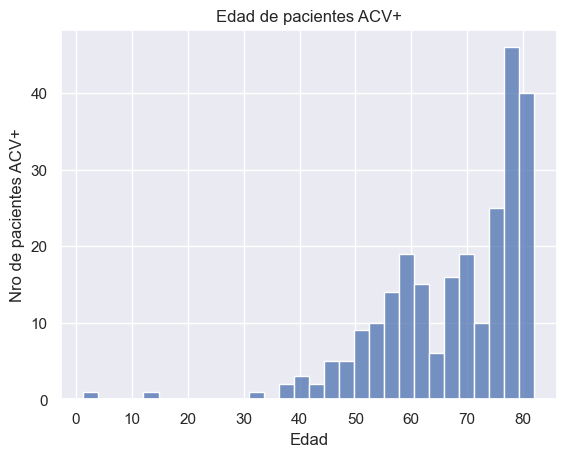

In [14]:
g4 = sns.histplot(stroked, x='age', bins=30, palette='pastel')
g4.set(title='Edad de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='Edad')

Se ve una clara dependencia de la edad con la incidencia de ACV. En particular, la incidencia de ACV se duplica entre los 70 y los 80 años.

### ¿Hay relación entre fumar y la incidencia de ACV?

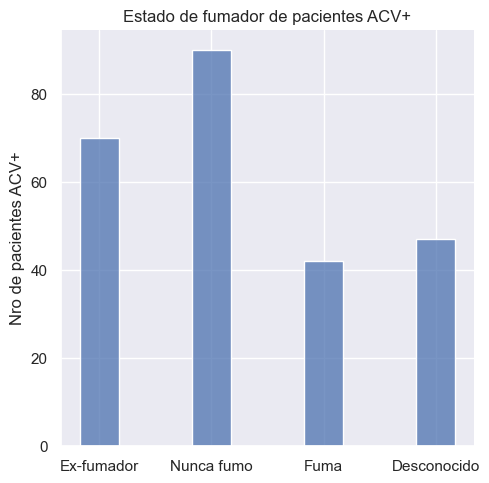

In [15]:
g5 = sns.displot(data=stroked, x='smoking_status', shrink=.35, palette='pastel')
g5.set(title='Estado de fumador de pacientes ACV+', ylabel ='Nro de pacientes ACV+', xlabel='' )
g5.set_xticklabels(["Ex-fumador", "Nunca fumo", "Fuma", "Desconocido"])

Si bien la mayor parte la mayor población ACV+ nunca fumo, no se puede descartar la relación entre fumar y la incidencia de ACV

### ¿Hay relación entre los niveles medios de azúcar en sangre y la incidencia de ACV?
Una de las variables que correlaciona en el heatmap con la incidencia de ACV es el nivel promedio de azucar en sangre. Para comprobar esto graficamos el nivel promedio de azucar de la población ACV+ y la ACV-

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

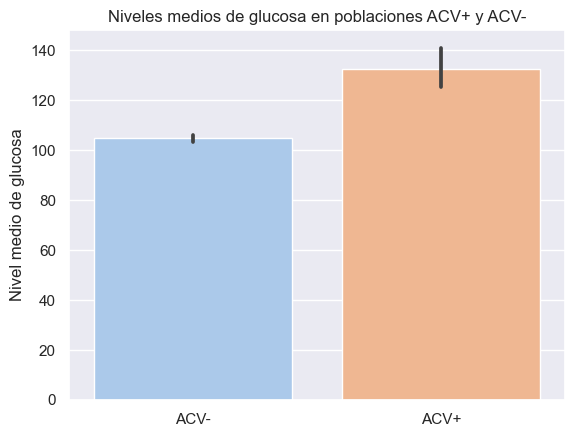

In [16]:
g6 = sns.barplot(data=df_stroke, x='stroke', y='avg_glucose_level', palette='pastel') 
g6.set(title='Niveles medios de glucosa en poblaciones ACV+ y ACV-', ylabel ='Nivel medio de glucosa', xlabel='' )
g6.set_xticklabels(['ACV-', 'ACV+'])

Parece haber una tendencia a mayores niveles de azucar en la población ACV+

### ¿Hay relación entre el indice de masa corporal y la incidencia de ACV?
Otra de las variables relacionadas con la incidencia de ACV fue el indice de masa corporal(BMI).

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

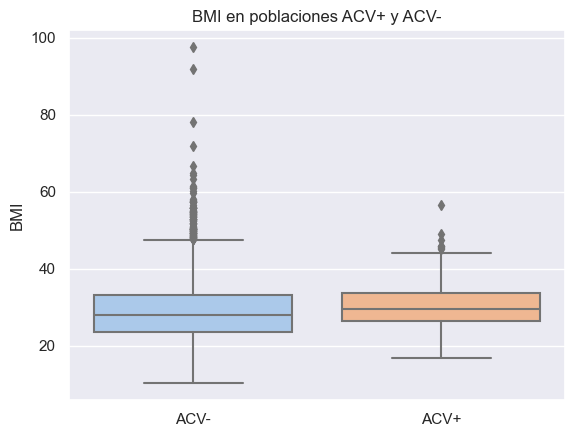

In [17]:
g7 = sns.boxplot(x='stroke', y='bmi', data=df_stroke, palette='pastel')
g7.set(title='BMI en poblaciones ACV+ y ACV-', ylabel ='BMI', xlabel='')
g7.set_xticklabels(['ACV-', 'ACV+'])

Hay una ligera tendencia de un mayor BMI en la mediana del grupo que sufrio ACV. Igualmente esta dentro de los cuartiles del grupo sin ACV por lo que podria no ser estadisticamente significativo.

# Insights

Se realizó un análisis de datos exploratorio a un Dataset de datos etiquetados de pacientes ACV+ y ACV-. 
En primer lugar se observo que el género no parece presentar diferencias entre las poblaciones ACV+ y ACV-. La relación entre fumar y la incidencia de ACV, si bien no parece estar relacionada directamente a primera vista, no se puede descartar totalmente hasta analizar más en profundidad los datos, en parte también por los conocidos efectos adversos del cigarrillo.

Las variables categóricas como el tipo de residencia, el estado civil y el tipo de trabajo, parecen tener una relación con la incidencia de ACV. 

Por otro lado, la población ACV+ mostró niveles mayores de azúcar en sangre y una tendencia a un mayor índice de masa corporal que el grupo ACV-, lo que podria indicar una correlación entre la alimentación y la incidencia de ACV.

Finalmente, hay una clara correlación entre la edad y los sucesos de ACV. La gran mayoria de ACV se dieron a edades más avanzadas.

### Feature Selection

Para optimizar la implementación, ahorrar recursos computacionales y mejorar la interpretación de los datos, se procede a la selección de variables a analizar dentro de mi dataset.

En primer lugar se procede a eliminar las variables categóricas que (a mi críterio), presentan menor relevancia en comparación con las demás en la incidencia de ACV. Se vio que la incidencia de ACV no presentaba diferencia en el género. Adicionalmente, si la persona se caso o no, el tipo de trabajo y el tipo de residencia, no serán consideradas para el análisis.  

In [18]:
df_stroke.drop(['gender'], axis=1, inplace=True)
# df_stroke.drop(['gender', 'ever_married', 'work_type', 'Residence_type'], axis=1, inplace=True)

Se convierte la condición de fumador (variable categórica) en una variable numerica.

In [19]:
df_stroke = pd.get_dummies(df_stroke, columns=['smoking_status', 'ever_married', 'work_type', 'Residence_type'])
df_stroke

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,61.0,0,0,202.21,36.6,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,18.6,0,0,0,1,0,0,1,0,0,1,0,0,0,1
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,0,1,0,0,1,0,0,1,0


Seleccionamos la variable objetivo(y) y las variables independientes(X).

In [20]:
X = df_stroke.drop(columns='stroke')    
y = df_stroke['stroke']
# Muestro las variables dependientes
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

In [21]:
# Importo módulos y librerias necesarios
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

import sys
import joblib

# defino un modo que le falta
sys.modules['sklearn.externals.joblib'] = joblib

import warnings
warnings.filterwarnings('ignore')

El Sequential Forward Selection (SFS) es un algoritmo de selección de características que se utiliza para reducir la dimensionalidad de los datos en el aprendizaje automático. El objetivo del SFS es encontrar el conjunto de características óptimo que maximice el rendimiento de un modelo de clasificación o regresión.

El SFS comienza con un conjunto vacío de características y, en cada iteración, agrega una característica que maximiza el rendimiento del modelo. El proceso continúa hasta que se alcanza un número deseado de características o se mejora el rendimiento del modelo.

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

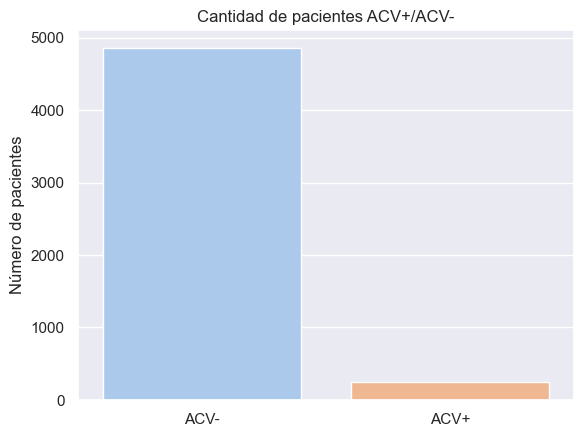

In [22]:
g8 = sns.countplot(data=df_stroke, x='stroke', palette='pastel')
g8.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g8.set_xticklabels(['ACV-', 'ACV+'])


In [23]:
# Submuestreo aleatorio de la clase mayoritaria
df_majority = df_stroke[df_stroke['stroke'] == 0]
df_minority = df_stroke[df_stroke['stroke'] == 1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combina la clase minoritaria con la clase mayoritaria subsampleada
df_balanced = pd.concat([df_majority_downsampled, df_minority])

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

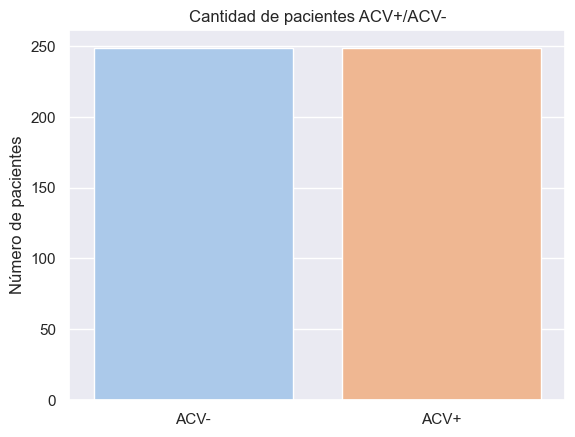

In [24]:
g = sns.countplot(data=df_balanced, x='stroke', palette='pastel')
g.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
g.set_xticklabels(['ACV-', 'ACV+'])

In [25]:
X = df_balanced.drop('stroke', axis=1)
y = df_balanced['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, shuffle=True)

In [26]:
# subo iteraciones del modelo pq sino no anda. La otra es normalizar o escalar data
log_reg = LogisticRegression(max_iter=1000)

In [27]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Evaluación del modelo

In [28]:
y_pred = log_reg.predict(X_test)

#### F1 score del modelo
El F1 score es una métrica comúnmente utilizada para evaluar la precisión de un modelo de clasificación.

In [29]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("El f1 score del modelo es:", f1)

El f1 score del modelo es: 0.7894736842105262


#### Recall del modelo
El recall es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación. El recall se define como la proporción de verdaderos positivos (TP) que se identifican correctamente entre todos los verdaderos positivos y falsos negativos (FN) en el conjunto de datos

In [30]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("El recall es:", recall)

El recall es: 0.75


Matriz de confusión:
[[58 12]
 [20 60]]


[Text(0, 0.5, 'ACV-'), Text(0, 1.5, 'ACV+')]

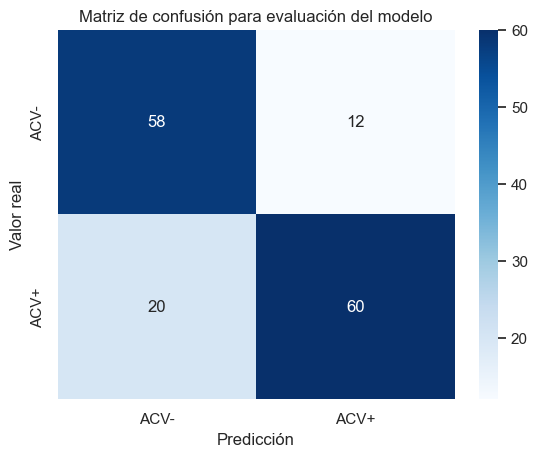

In [31]:
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
g.set(title='Matriz de confusión para evaluación del modelo', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['ACV-', 'ACV+']) 
g.set_yticklabels(['ACV-', 'ACV+'])

In [36]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [40]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sandiegocounty.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.sandiegocounty.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("5sib-ba59", limit=2000)

results
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
print(results_df)

       condition               outcome  year               geography geotype  \
0     CHD/Stroke                 Death  2017        San Diego County      NA   
1     CHD/Stroke                 Death  2017          Central Region  Region   
2     CHD/Stroke                 Death  2017       Central San Diego     SRA   
3     CHD/Stroke                 Death  2017                Mid-City     SRA   
4     CHD/Stroke                 Death  2017  Southeastern San Diego     SRA   
...          ...                   ...   ...                     ...     ...   
1995  CHD/Stroke  In-Patient Treatment  2011               Peninsula     SRA   
1996  CHD/Stroke  In-Patient Treatment  2011              University     SRA   
1997  CHD/Stroke  In-Patient Treatment  2011    North Coastal Region  Region   
1998  CHD/Stroke  In-Patient Treatment  2011                Carlsbad     SRA   
1999  CHD/Stroke  In-Patient Treatment  2011               Oceanside     SRA   

                     geoname geoid     